## End-Term task

Welcome to your End-Term task.
<br/> You have 5 tasks to complete this assignment:
<br/> 1. Perform Data Exploration
<br/> 2. Perform Feature Engineering 
<br/> 3. Choose a model of regressor and explain your choice 
<br/> 4. Train your model and use it to predict test dataset
<br/> 5. Measure your results

Context
To Explore more on Regression Algorithm

Content

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000

- PTRATIO: pupil-teacher ratio by town 
- B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

### Importing basic packages, add your needed ones if necessary

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt

### Load training data

In [2]:
cols = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', delim_whitespace=True, names=cols, header=None)

In [3]:
data.shape

(506, 14)

In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


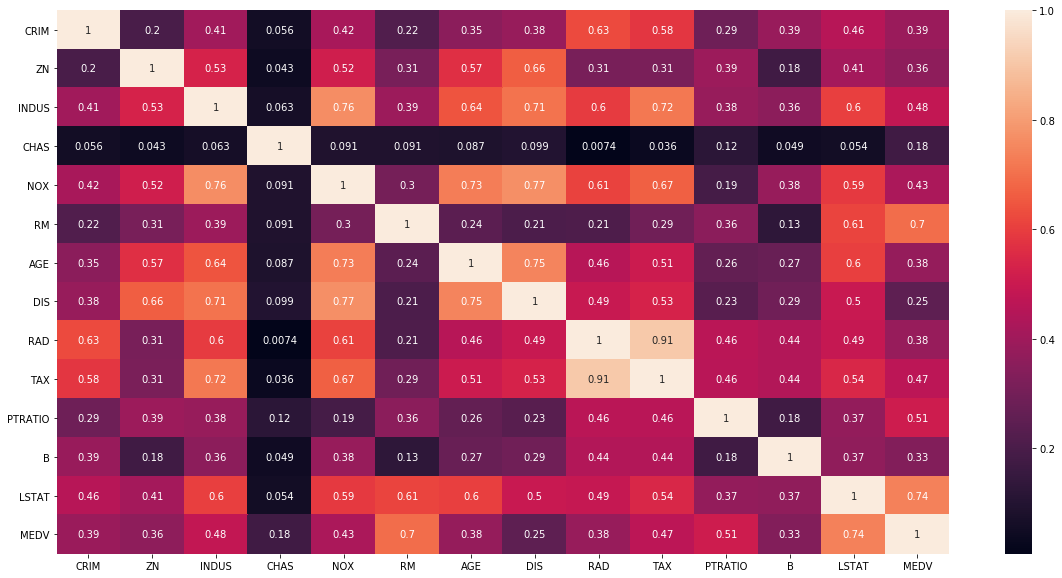

In [5]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(), annot=True)

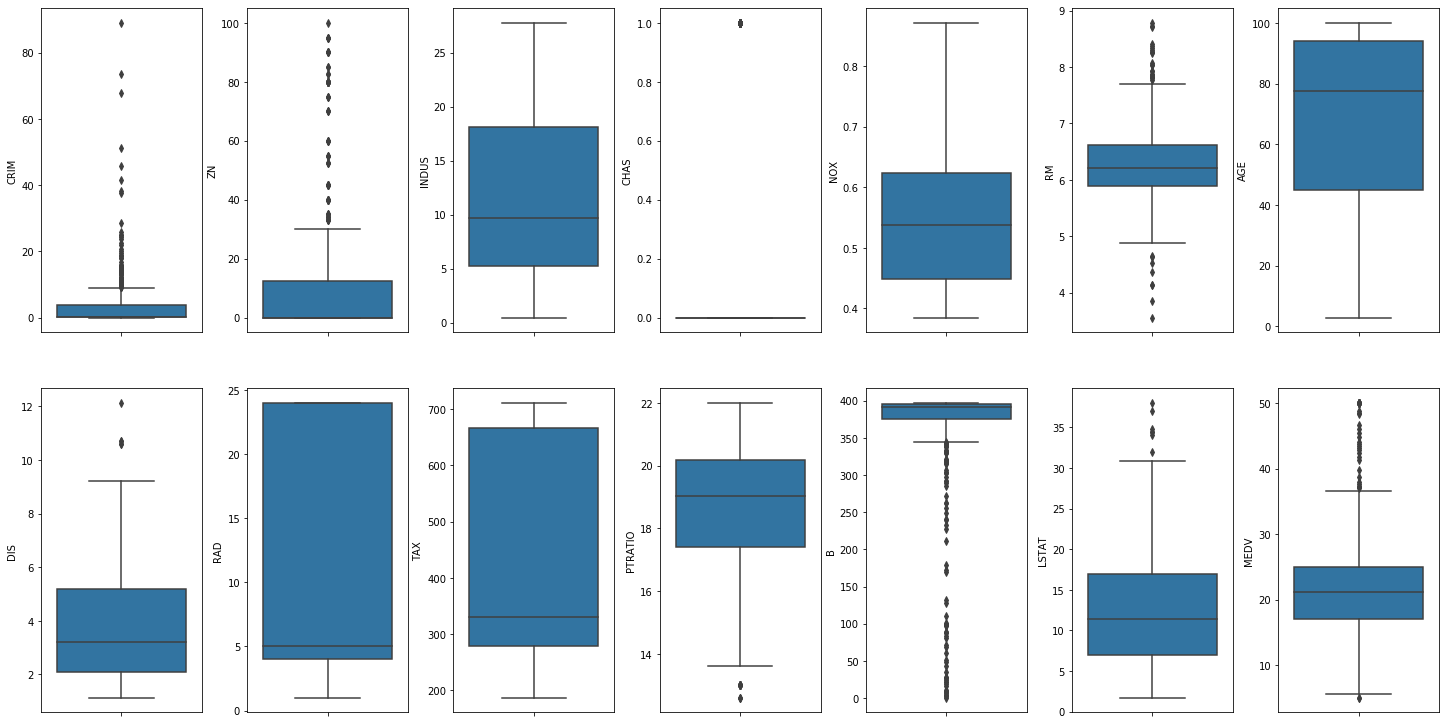

In [6]:
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [7]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [8]:
data=data[((data['CRIM'] < (q1-1.5*iqr)) | (data['CRIM'] > (q3+1.5*iqr)))]
data=data[((data['ZN'] < (q1-1.5*iqr)) | (data['ZN'] > (q3+1.5*iqr)))]
data=data[((data['B'] < (q1-1.5*iqr)) | (data['B'] > (q3+1.5*iqr)))]

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.707670,12.233232,10.273018,0.082317,0.534839,6.294216,64.828963,3.978726,6.060976,357.585366,18.276524,374.656006,11.289360,23.677744
std,7.835222,27.552863,6.932054,0.275267,0.111344,0.685478,28.227255,2.027577,5.888563,128.254735,2.125101,53.282386,6.406432,8.420615
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.321600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.066358,0.000000,4.490000,0.000000,0.448000,5.878500,38.800000,2.425900,4.000000,277.000000,17.000000,377.987500,6.342500,18.900000
50%,0.171380,0.000000,8.140000,0.000000,0.515000,6.163500,71.450000,3.571200,4.000000,307.000000,18.400000,392.250000,10.145000,21.900000
75%,0.755943,0.000000,18.100000,0.000000,0.583000,6.619750,91.125000,5.116700,5.000000,403.000000,20.200000,396.215000,14.642500,26.600000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [10]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['MEDV', 'CHAS'])
y = data.MEDV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [11]:
print(x_train.shape) 
print(x_test.shape)
print(y_train.shape) 
print(y_test.shape)

(219, 12)
(109, 12)
(219,)
(109,)


In [12]:
from sklearn.linear_model import LinearRegression

l_r = LinearRegression()
l_r.fit(x_train, y_train)

y_pred_l_r = l_r.predict(x_test)

In [13]:
from sklearn import metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('mean_absolute_error:')
print(metrics.mean_absolute_error(y_test,y_pred_l_r))
print('mean_squared_error:')
print(metrics.mean_squared_error(y_test,y_pred_l_r))
print('r2_score:')
print(metrics.r2_score(y_test,y_pred_l_r))
print('mean_absolute_percentage_error:')
print(mean_absolute_percentage_error(y_test,y_pred_l_r))

mean_absolute_error:
2.8062051990827297
mean_squared_error:
16.55146754395637
r2_score:
0.7783664532007992
mean_absolute_percentage_error:
12.009433142999828


### Make a short report on your work.

For my endterm task I have chosen Linear Regression, I have removed rows with outliers for columns where outliers rate was too high, as a result, I got shrinked dataset, which was splitted into train and test dataset, where I have removed column with 100% outliers value. I have applied Linear Regression and as a result I have got 77.8% R2-score. 